In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
individual_household_electric_power_consumption = fetch_ucirepo(id=235)

# data (as pandas dataframes)
X = individual_household_electric_power_consumption.data.features
y = individual_household_electric_power_consumption.data.targets

# metadata
print(individual_household_electric_power_consumption.metadata)

# variable information
print(individual_household_electric_power_consumption.variables)


/usr/local/lib/python3.12/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuration pour les graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 80)
print("ANALYSE DE CORRÉLATION - CONSOMMATION ÉLECTRIQUE RÉSIDENTIELLE")
print("=" * 80)

ANALYSE DE CORRÉLATION - CONSOMMATION ÉLECTRIQUE RÉSIDENTIELLE


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuration pour les graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 80)
print("ANALYSE DE CORRÉLATION - CONSOMMATION ÉLECTRIQUE RÉSIDENTIELLE")
print("=" * 80)

# 1. CHARGEMENT ET PRÉPARATION DES DONNÉES
# ============================================================================

print("\n[1] CHARGEMENT DES DONNÉES...")

# Use the already loaded X dataframe from ucimlrepo
df = X.copy()

# Combine Date and Time into a single datetime column
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop original 'Date' and 'Time' columns
df = df.drop(columns=['Date', 'Time'])

# Identify numerical columns and convert them to numeric, coercing errors to NaN
numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Reorder columns to have 'datetime' first
cols_order = ['datetime'] + numerical_cols
df = df[cols_order]

print(f"✓ Dimensions du dataset: {df.shape[0]:,} lignes × {df.shape[1]} colonnes")
print(f"✓ Période: {df['datetime'].min()} à {df['datetime'].max()}")

# Afficher les premières lignes
print("\n📊 Aperçu des données:")
print(df.head())

# Informations sur les colonnes
print("\n📋 Structure du dataset:")
print(df.info())

ANALYSE DE CORRÉLATION - CONSOMMATION ÉLECTRIQUE RÉSIDENTIELLE

[1] CHARGEMENT DES DONNÉES...
✓ Dimensions du dataset: 2,075,259 lignes × 8 colonnes
✓ Période: 2006-12-16 17:24:00 à 2010-11-26 21:02:00

📊 Aperçu des données:
             datetime  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0       

In [6]:
# 2. NETTOYAGE DES DONNÉES
# ============================================================================

print("\n[2] NETTOYAGE DES DONNÉES...")

# Statistiques sur les valeurs manquantes
print("\n🔍 Valeurs manquantes par colonne:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Manquantes': missing,
    'Pourcentage': missing_pct
})
print(missing_df[missing_df['Manquantes'] > 0])

# Convertir les colonnes en numérique
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Supprimer les lignes avec trop de valeurs manquantes
initial_rows = len(df)
df = df.dropna()
print(f"✓ Lignes supprimées: {initial_rows - len(df):,} ({((initial_rows - len(df)) / initial_rows * 100):.2f}%)")
print(f"✓ Lignes restantes: {len(df):,}")



[2] NETTOYAGE DES DONNÉES...

🔍 Valeurs manquantes par colonne:
                       Manquantes  Pourcentage
Global_active_power         25979     1.251844
Global_reactive_power       25979     1.251844
Voltage                     25979     1.251844
Global_intensity            25979     1.251844
Sub_metering_1              25979     1.251844
Sub_metering_2              25979     1.251844
Sub_metering_3              25979     1.251844
✓ Lignes supprimées: 25,979 (1.25%)
✓ Lignes restantes: 2,049,280


In [7]:
# 3. STATISTIQUES DESCRIPTIVES
# ============================================================================

print("\n[3] STATISTIQUES DESCRIPTIVES...")

stats_desc = df[numeric_cols].describe()
print("\n📈 Statistiques descriptives:")
print(stats_desc.round(3))



[3] STATISTIQUES DESCRIPTIVES...

📈 Statistiques descriptives:
       Global_active_power  Global_reactive_power     Voltage  \
count          2049280.000            2049280.000  2049280.00   
mean                 1.092                  0.124      240.84   
std                  1.057                  0.113        3.24   
min                  0.076                  0.000      223.20   
25%                  0.308                  0.048      238.99   
50%                  0.602                  0.100      241.01   
75%                  1.528                  0.194      242.89   
max                 11.122                  1.390      254.15   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count       2049280.000     2049280.000     2049280.000     2049280.000  
mean              4.628           1.122           1.299           6.458  
std               4.444           6.153           5.822           8.437  
min               0.200           0.000           0.00


[4] CALCUL DE LA MATRICE DE CORRÉLATION...

🔢 Matrice de corrélation (Pearson):
                       Global_active_power  Global_reactive_power  Voltage  \
Global_active_power                  1.000                  0.247   -0.400   
Global_reactive_power                0.247                  1.000   -0.112   
Voltage                             -0.400                 -0.112    1.000   
Global_intensity                     0.999                  0.266   -0.411   
Sub_metering_1                       0.484                  0.123   -0.196   
Sub_metering_2                       0.435                  0.139   -0.167   
Sub_metering_3                       0.639                  0.090   -0.268   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power               0.999           0.484           0.435   
Global_reactive_power             0.266           0.123           0.139   
Voltage                          -0.411          -0.196          -0.1

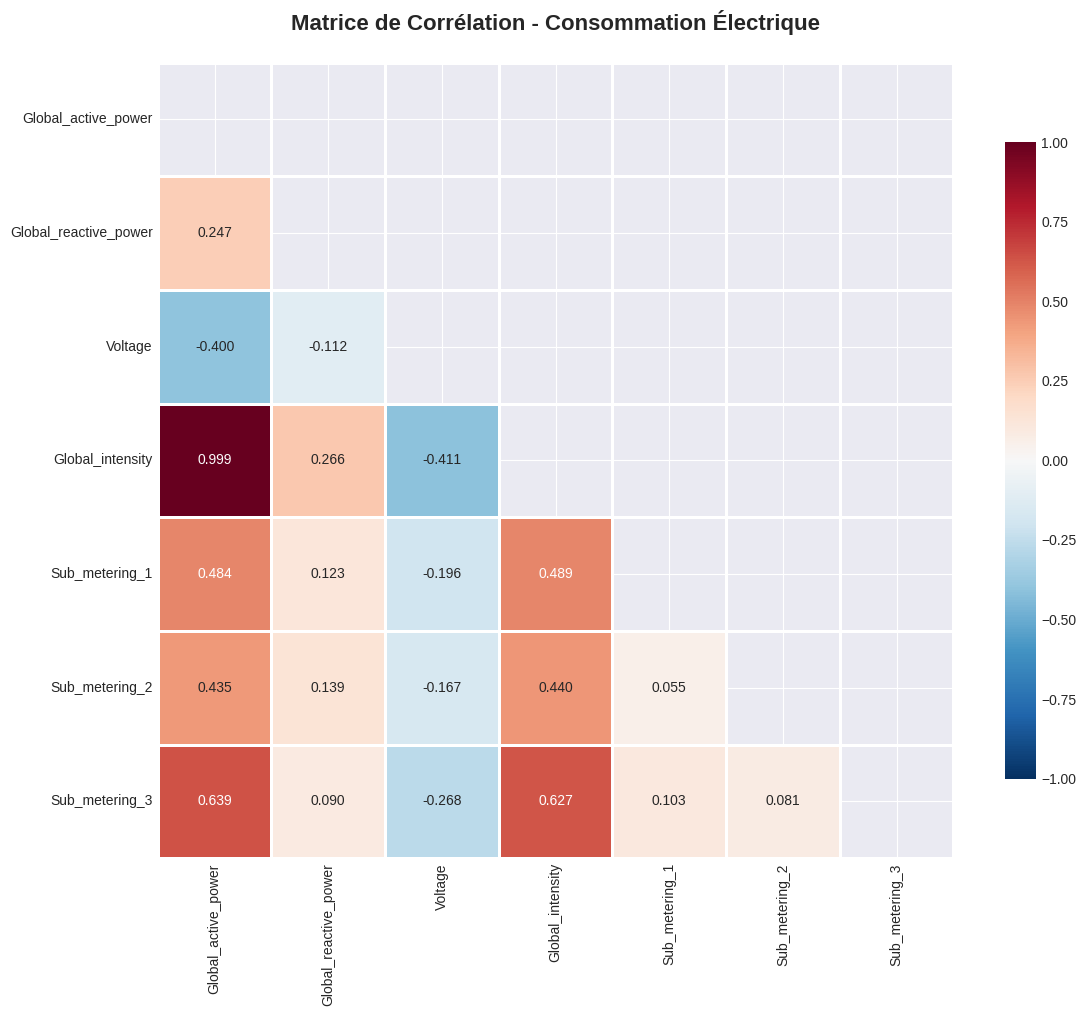

In [8]:
# 4. MATRICE DE CORRÉLATION COMPLÈTE
# ============================================================================

print("\n[4] CALCUL DE LA MATRICE DE CORRÉLATION...")

# Calculer la matrice de corrélation de Pearson
correlation_matrix = df[numeric_cols].corr(method='pearson')

print("\n🔢 Matrice de corrélation (Pearson):")
print(correlation_matrix.round(3))

# Visualisation: Heatmap de corrélation
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            fmt='.3f',
            cmap='RdBu_r',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8},
            vmin=-1,
            vmax=1)
plt.title('Matrice de Corrélation - Consommation Électrique\n', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Heatmap sauvegardée: correlation_heatmap.png")
plt.show()


In [9]:
# 5. ANALYSE DES CORRÉLATIONS SIGNIFICATIVES
# ============================================================================

print("\n[5] ANALYSE DES CORRÉLATIONS SIGNIFICATIVES...")

# Fonction pour calculer p-value
def calculate_pvalues(df_data):
    """Calcule les p-values pour chaque paire de variables"""
    cols = df_data.columns
    pvalues = np.zeros((len(cols), len(cols)))

    for i, col1 in enumerate(cols):
        for j, col2 in enumerate(cols):
            if i != j:
                _, pvalue = stats.pearsonr(df_data[col1], df_data[col2])
                pvalues[i, j] = pvalue

    return pd.DataFrame(pvalues, columns=cols, index=cols)

# Calculer les p-values
pvalues_matrix = calculate_pvalues(df[numeric_cols])

print("\n📊 Corrélations significatives (|r| > 0.5 et p < 0.05):")
print("-" * 80)

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        p_val = pvalues_matrix.iloc[i, j]

        if abs(corr_val) > 0.5 and p_val < 0.05:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]

            # Interpréter la force de la corrélation
            if abs(corr_val) > 0.7:
                force = "FORTE"
            elif abs(corr_val) > 0.5:
                force = "MODÉRÉE"
            else:
                force = "FAIBLE"

            direction = "positive" if corr_val > 0 else "négative"

            print(f"{var1:25} ↔ {var2:25}")
            print(f"  → Corrélation {direction}: r = {corr_val:7.4f} ({force})")
            print(f"  → p-value: {p_val:.2e} {'✓ Significative' if p_val < 0.05 else '✗ Non significative'}")
            print()


[5] ANALYSE DES CORRÉLATIONS SIGNIFICATIVES...

📊 Corrélations significatives (|r| > 0.5 et p < 0.05):
--------------------------------------------------------------------------------
Global_active_power       ↔ Global_intensity         
  → Corrélation positive: r =  0.9989 (FORTE)
  → p-value: 0.00e+00 ✓ Significative

Global_active_power       ↔ Sub_metering_3           
  → Corrélation positive: r =  0.6386 (MODÉRÉE)
  → p-value: 0.00e+00 ✓ Significative

Global_intensity          ↔ Sub_metering_3           
  → Corrélation positive: r =  0.6265 (MODÉRÉE)
  → p-value: 0.00e+00 ✓ Significative




[6] GÉNÉRATION DES SCATTER PLOTS...
✓ Scatter plots sauvegardés: scatter_plots.png


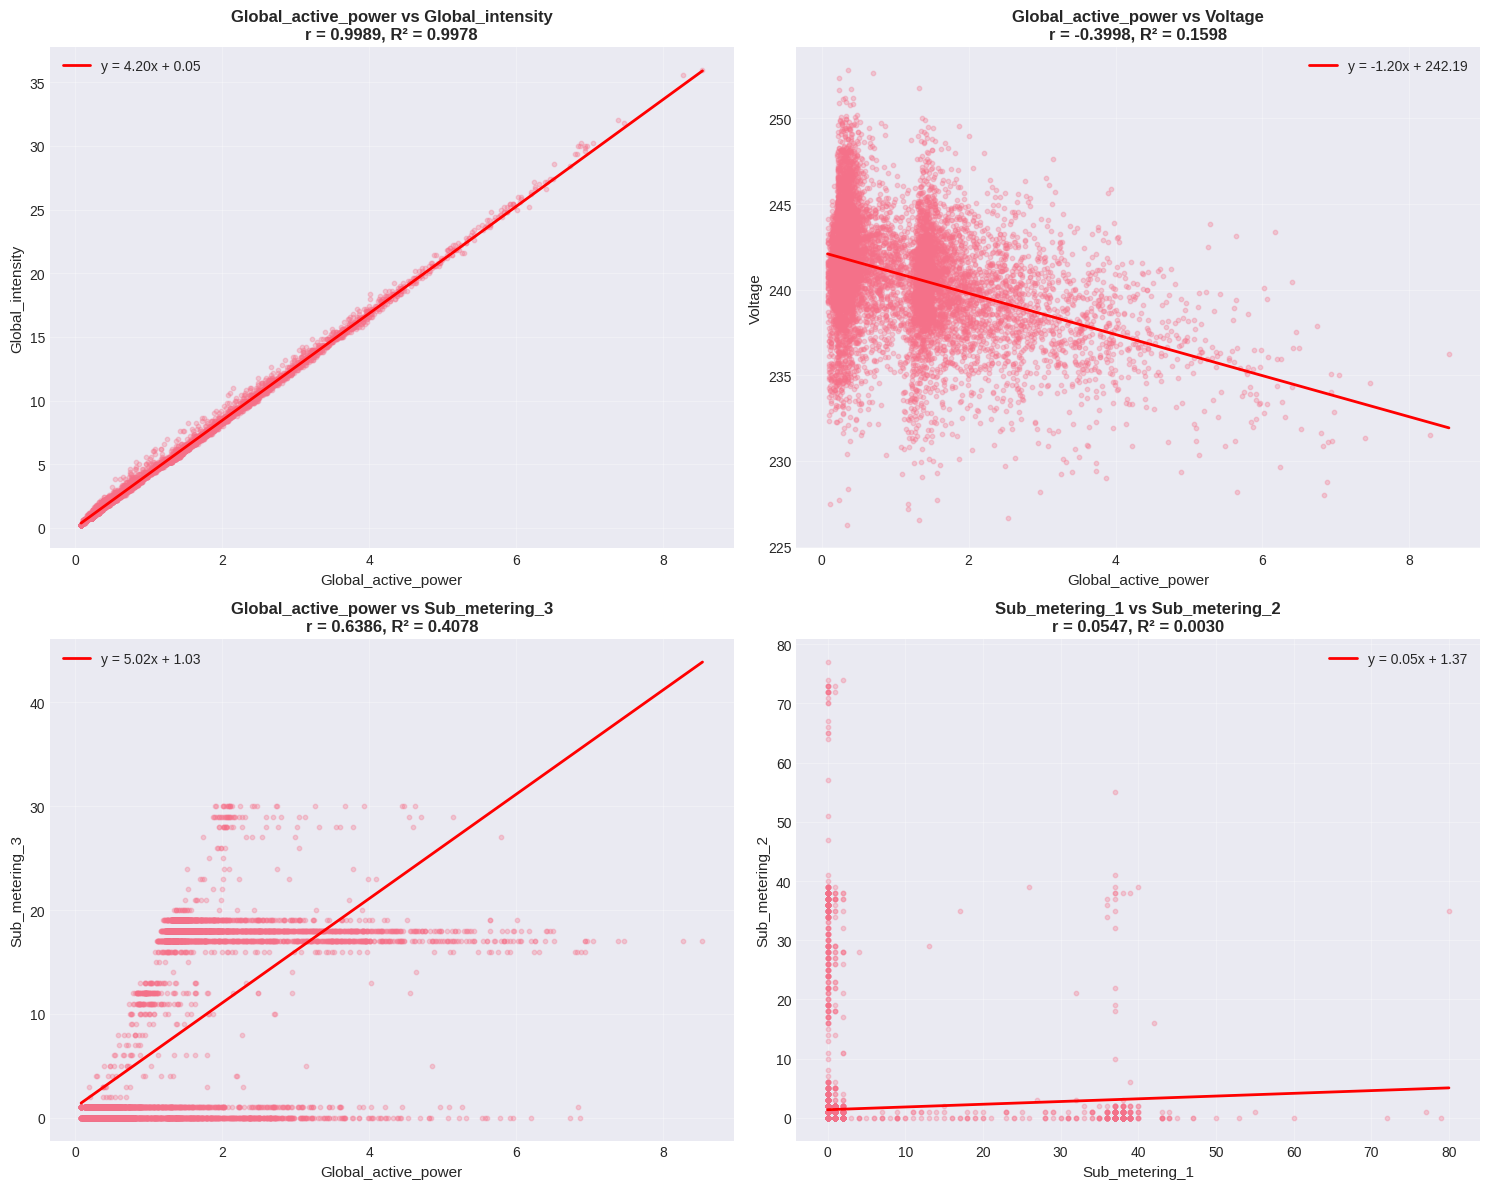

In [10]:
# 6. SCATTER PLOTS POUR LES CORRÉLATIONS FORTES
# ============================================================================

print("\n[6] GÉNÉRATION DES SCATTER PLOTS...")

# Sous-échantillonner pour la visualisation (trop de points)
df_sample = df.sample(n=min(10000, len(df)), random_state=42)

# Liste des paires à visualiser
pairs = [
    ('Global_active_power', 'Global_intensity'),
    ('Global_active_power', 'Voltage'),
    ('Global_active_power', 'Sub_metering_3'),
    ('Sub_metering_1', 'Sub_metering_2')
]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, (var1, var2) in enumerate(pairs):
    ax = axes[idx]

    # Scatter plot
    ax.scatter(df_sample[var1], df_sample[var2], alpha=0.3, s=10)

    # Ligne de régression
    z = np.polyfit(df_sample[var1], df_sample[var2], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df_sample[var1].min(), df_sample[var1].max(), 100)
    ax.plot(x_line, p(x_line), "r-", linewidth=2, label=f'y = {z[0]:.2f}x + {z[1]:.2f}')

    # Corrélation
    corr = correlation_matrix.loc[var1, var2]
    r_squared = corr ** 2

    ax.set_xlabel(var1, fontsize=11)
    ax.set_ylabel(var2, fontsize=11)
    ax.set_title(f'{var1} vs {var2}\nr = {corr:.4f}, R² = {r_squared:.4f}',
                 fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('scatter_plots.png', dpi=300, bbox_inches='tight')
print("✓ Scatter plots sauvegardés: scatter_plots.png")
plt.show()



[7] ANALYSE DES CORRÉLATIONS TEMPORELLES...

⏰ Corrélation Global_active_power vs Sub_metering_3 par heure:
✓ Graphique temporel sauvegardé: temporal_correlation.png


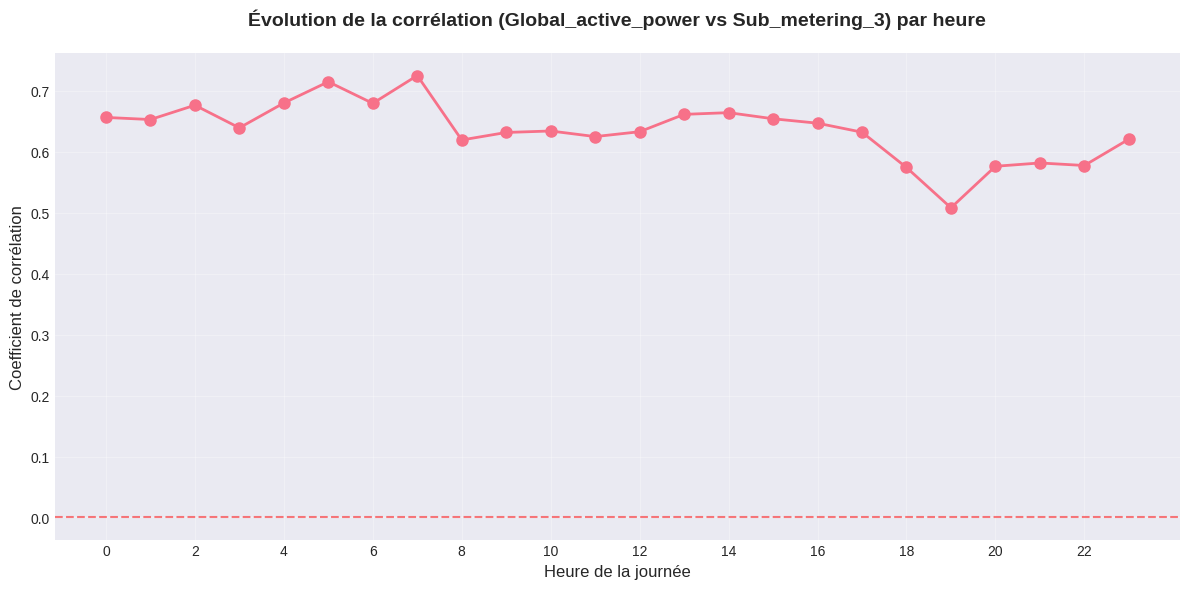

In [11]:
# 7. CORRÉLATIONS TEMPORELLES
# ============================================================================

print("\n[7] ANALYSE DES CORRÉLATIONS TEMPORELLES...")

# Ajouter des colonnes temporelles
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.dayofweek

# Corrélation par heure de la journée
print("\n⏰ Corrélation Global_active_power vs Sub_metering_3 par heure:")
hourly_corr = []
for hour in range(24):
    df_hour = df[df['hour'] == hour]
    if len(df_hour) > 30:  # Assez de données
        corr = df_hour['Global_active_power'].corr(df_hour['Sub_metering_3'])
        hourly_corr.append({'hour': hour, 'correlation': corr})

hourly_corr_df = pd.DataFrame(hourly_corr)

# Visualiser
plt.figure(figsize=(12, 6))
plt.plot(hourly_corr_df['hour'], hourly_corr_df['correlation'],
         marker='o', linewidth=2, markersize=8)
plt.xlabel('Heure de la journée', fontsize=12)
plt.ylabel('Coefficient de corrélation', fontsize=12)
plt.title('Évolution de la corrélation (Global_active_power vs Sub_metering_3) par heure\n',
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('temporal_correlation.png', dpi=300, bbox_inches='tight')
print("✓ Graphique temporel sauvegardé: temporal_correlation.png")
plt.show()

In [12]:
# 8. RAPPORT FINAL
# ============================================================================

print("\n" + "=" * 80)
print("RÉSUMÉ DE L'ANALYSE DE CORRÉLATION")
print("=" * 80)

print("\n🎯 CORRÉLATIONS PRINCIPALES IDENTIFIÉES:")
print("\n1. CORRÉLATIONS TRÈS FORTES (|r| > 0.7):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            print(f"   • {var1} ↔ {var2}: r = {corr_val:.4f}")

print("\n2. CORRÉLATIONS MODÉRÉES (0.5 < |r| < 0.7):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if 0.5 < abs(corr_val) <= 0.7:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            print(f"   • {var1} ↔ {var2}: r = {corr_val:.4f}")

print("\n3. CORRÉLATIONS NÉGATIVES NOTABLES:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if corr_val < -0.3:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            print(f"   • {var1} ↔ {var2}: r = {corr_val:.4f}")

print("\n📁 Fichiers générés:")
print("   • correlation_heatmap.png - Matrice de corrélation")
print("   • scatter_plots.png - Graphiques de dispersion")
print("   • temporal_correlation.png - Évolution temporelle")

print("\n✅ Analyse terminée avec succès!")
print("=" * 80)


RÉSUMÉ DE L'ANALYSE DE CORRÉLATION

🎯 CORRÉLATIONS PRINCIPALES IDENTIFIÉES:

1. CORRÉLATIONS TRÈS FORTES (|r| > 0.7):
   • Global_active_power ↔ Global_intensity: r = 0.9989

2. CORRÉLATIONS MODÉRÉES (0.5 < |r| < 0.7):
   • Global_active_power ↔ Sub_metering_3: r = 0.6386
   • Global_intensity ↔ Sub_metering_3: r = 0.6265

3. CORRÉLATIONS NÉGATIVES NOTABLES:
   • Global_active_power ↔ Voltage: r = -0.3998
   • Voltage ↔ Global_intensity: r = -0.4114

📁 Fichiers générés:
   • correlation_heatmap.png - Matrice de corrélation
   • scatter_plots.png - Graphiques de dispersion
   • temporal_correlation.png - Évolution temporelle

✅ Analyse terminée avec succès!


A.2 Code pour tests statistiques complémentaires

In [13]:
from scipy.stats import shapiro, normaltest, spearmanr, kendalltau

# Test de normalité (prérequis Pearson)
print("\n[TEST DE NORMALITÉ - SHAPIRO-WILK]")
print("-" * 60)

for col in numeric_cols:
    # Échantillonner (Shapiro limité à 5000 observations)
    sample = df[col].sample(n=min(5000, len(df)), random_state=42)
    stat, p_value = shapiro(sample)

    normal = "✓ Normal" if p_value > 0.05 else "✗ Non normal"
    print(f"{col:30} | stat={stat:.4f} | p={p_value:.4e} | {normal}")

# Corrélations de Spearman (robuste, non-paramétrique)
print("\n[CORRÉLATION DE SPEARMAN - Alternative robuste]")
print("-" * 60)

spearman_matrix = df[numeric_cols].corr(method='spearman')
print("\nMatrice de Spearman (5 premières corrélations):")

correlations = []
for i in range(len(spearman_matrix.columns)):
    for j in range(i+1, len(spearman_matrix.columns)):
        var1 = spearman_matrix.columns[i]
        var2 = spearman_matrix.columns[j]
        rho = spearman_matrix.iloc[i, j]
        correlations.append((abs(rho), var1, var2, rho))

correlations.sort(reverse=True)
for _, var1, var2, rho in correlations[:5]:
    print(f"  {var1:25} ↔ {var2:25} | ρ = {rho:.4f}")

# Corrélation partielle
print("\n[CORRÉLATION PARTIELLE]")
print("-" * 60)
print("Exemple: Corrélation GAP ↔ SM3 en contrôlant le Voltage\n")

from scipy.stats import pearsonr

# Corrélation simple
r_gap_sm3, _ = pearsonr(df['Global_active_power'], df['Sub_metering_3'])
print(f"Corrélation simple GAP ↔ SM3: r = {r_gap_sm3:.4f}")

# Régression pour obtenir résidus
from sklearn.linear_model import LinearRegression

# Résidus GAP après retrait effet Voltage
X_voltage = df[['Voltage']].values
y_gap = df['Global_active_power'].values
model1 = LinearRegression().fit(X_voltage, y_gap)
residuals_gap = y_gap - model1.predict(X_voltage)

# Résidus SM3 après retrait effet Voltage
y_sm3 = df['Sub_metering_3'].values
model2 = LinearRegression().fit(X_voltage, y_sm3)
residuals_sm3 = y_sm3 - model2.predict(X_voltage)

# Corrélation des résidus = corrélation partielle
r_partial, _ = pearsonr(residuals_gap, residuals_sm3)
print(f"Corrélation partielle (contrôlant Voltage): r = {r_partial:.4f}")
print(f"Différence: Δr = {abs(r_gap_sm3 - r_partial):.4f}")


[TEST DE NORMALITÉ - SHAPIRO-WILK]
------------------------------------------------------------
Global_active_power            | stat=0.7967 | p=6.7975e-62 | ✗ Non normal
Global_reactive_power          | stat=0.8935 | p=2.7956e-50 | ✗ Non normal
Voltage                        | stat=0.9893 | p=4.7111e-19 | ✗ Non normal
Global_intensity               | stat=0.7952 | p=4.9288e-62 | ✗ Non normal
Sub_metering_1                 | stat=0.1727 | p=2.0539e-91 | ✗ Non normal
Sub_metering_2                 | stat=0.2112 | p=2.5632e-90 | ✗ Non normal
Sub_metering_3                 | stat=0.6865 | p=2.2142e-70 | ✗ Non normal

[CORRÉLATION DE SPEARMAN - Alternative robuste]
------------------------------------------------------------

Matrice de Spearman (5 premières corrélations):
  Global_active_power       ↔ Global_intensity          | ρ = 0.9954
  Global_active_power       ↔ Sub_metering_3            | ρ = 0.6036
  Global_intensity          ↔ Sub_metering_3            | ρ = 0.6002
  Global_rea

A.3 Code pour analyse saisonnière


[ANALYSE SAISONNIÈRE]
------------------------------------------------------------
Hiver           | GAP ↔ SM3: r = 0.5934 | n = 493,912
Printemps       | GAP ↔ SM3: r = 0.6390 | n = 524,156
Été             | GAP ↔ SM3: r = 0.6963 | n = 518,290
Automne         | GAP ↔ SM3: r = 0.6338 | n = 512,922


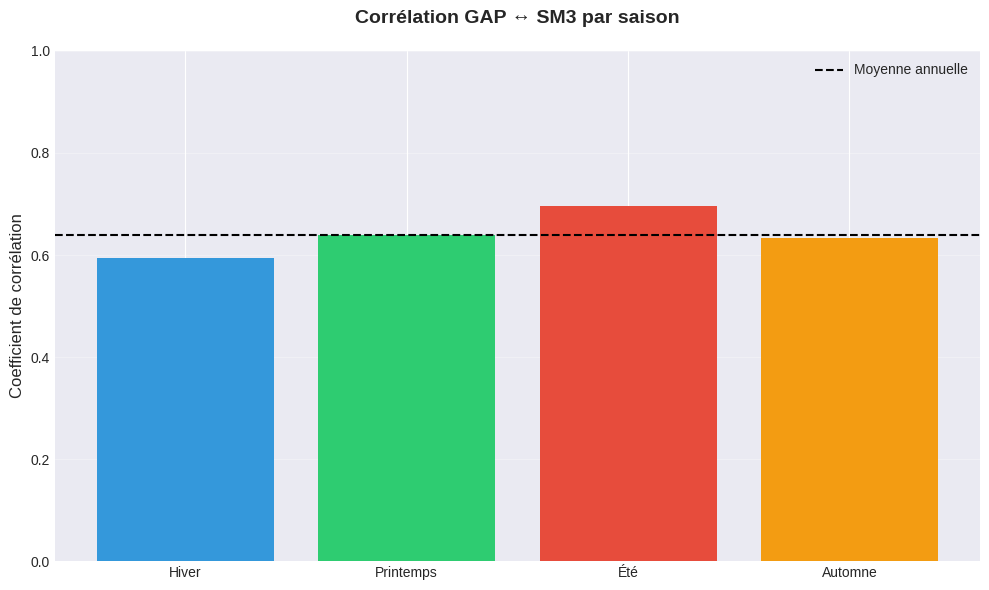


✓ Graphique saisonnier sauvegardé: seasonal_correlation.png


In [14]:
# Analyse par saison
print("\n[ANALYSE SAISONNIÈRE]")
print("-" * 60)

# Définir les saisons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Hiver'
    elif month in [3, 4, 5]:
        return 'Printemps'
    elif month in [6, 7, 8]:
        return 'Été'
    else:
        return 'Automne'

df['season'] = df['month'].apply(get_season)

# Corrélations par saison
seasons = ['Hiver', 'Printemps', 'Été', 'Automne']
seasonal_corr = {}

for season in seasons:
    df_season = df[df['season'] == season]
    corr_gap_sm3 = df_season['Global_active_power'].corr(
        df_season['Sub_metering_3']
    )
    seasonal_corr[season] = corr_gap_sm3
    print(f"{season:15} | GAP ↔ SM3: r = {corr_gap_sm3:.4f} | n = {len(df_season):,}")

# Visualisation
plt.figure(figsize=(10, 6))
seasons_list = list(seasonal_corr.keys())
corr_values = list(seasonal_corr.values())

plt.bar(seasons_list, corr_values, color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'])
plt.axhline(y=correlation_matrix.loc['Global_active_power', 'Sub_metering_3'],
            color='black', linestyle='--', label='Moyenne annuelle')
plt.ylabel('Coefficient de corrélation', fontsize=12)
plt.title('Corrélation GAP ↔ SM3 par saison\n', fontsize=14, fontweight='bold')
plt.ylim([0, 1])
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('seasonal_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Graphique saisonnier sauvegardé: seasonal_correlation.png")

A.4 Code pour intervalles de confiance (Bootstrap)


[INTERVALLES DE CONFIANCE - BOOTSTRAP]
------------------------------------------------------------
Corrélation GAP ↔ GI:
  Moyenne bootstrap: r = 0.9989
  IC 95%: [0.9988, 0.9990]
  Largeur IC: 0.0002


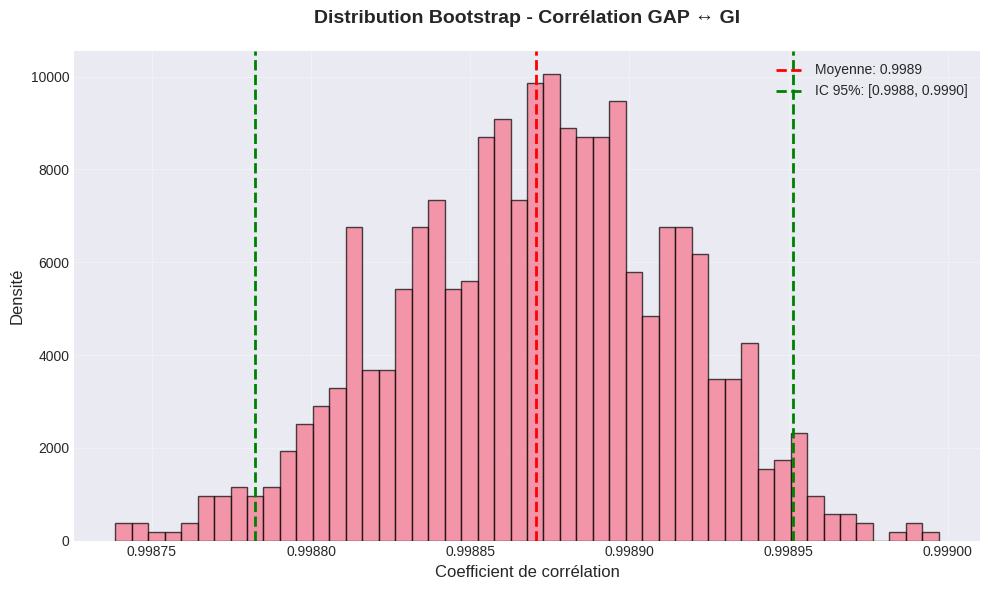


✓ Distribution bootstrap sauvegardée: bootstrap_distribution.png


In [15]:
from scipy.stats import bootstrap

# Bootstrap pour intervalles de confiance
print("\n[INTERVALLES DE CONFIANCE - BOOTSTRAP]")
print("-" * 60)

def correlation_statistic(x, y):
    """Fonction pour calculer la corrélation"""
    return np.corrcoef(x, y)[0, 1]

# Exemple: IC pour corrélation GAP ↔ GI
data_gap = df['Global_active_power'].values
data_gi = df['Global_intensity'].values

# Échantillonner (bootstrap coûteux)
n_sample = 10000
sample_indices = np.random.choice(len(data_gap), n_sample, replace=False)
data_gap_sample = data_gap[sample_indices]
data_gi_sample = data_gi[sample_indices]

# Bootstrap manuel (plus simple)
n_bootstrap = 1000
bootstrap_corrs = []

for _ in range(n_bootstrap):
    indices = np.random.choice(len(data_gap_sample),
                               len(data_gap_sample),
                               replace=True)
    corr = np.corrcoef(data_gap_sample[indices],
                       data_gi_sample[indices])[0, 1]
    bootstrap_corrs.append(corr)

# Calculer IC 95%
ci_lower = np.percentile(bootstrap_corrs, 2.5)
ci_upper = np.percentile(bootstrap_corrs, 97.5)
mean_corr = np.mean(bootstrap_corrs)

print(f"Corrélation GAP ↔ GI:")
print(f"  Moyenne bootstrap: r = {mean_corr:.4f}")
print(f"  IC 95%: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"  Largeur IC: {ci_upper - ci_lower:.4f}")

# Visualiser distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_corrs, bins=50, density=True, alpha=0.7, edgecolor='black')
plt.axvline(mean_corr, color='red', linestyle='--', linewidth=2,
            label=f'Moyenne: {mean_corr:.4f}')
plt.axvline(ci_lower, color='green', linestyle='--', linewidth=2,
            label=f'IC 95%: [{ci_lower:.4f}, {ci_upper:.4f}]')
plt.axvline(ci_upper, color='green', linestyle='--', linewidth=2)
plt.xlabel('Coefficient de corrélation', fontsize=12)
plt.ylabel('Densité', fontsize=12)
plt.title('Distribution Bootstrap - Corrélation GAP ↔ GI\n',
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('bootstrap_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Distribution bootstrap sauvegardée: bootstrap_distribution.png")